In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import cv2
import os 
import PIL
from tensorflow.keras import layers
from keras import Sequential

In [2]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir


'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
flowers_dict={
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*'))
}

In [7]:
flowers_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/.ipynb_checkpoints'),
 WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/104665583

In [8]:
flowers_dict_label={
    'roses':0,
    'tulips':1,
    'sunflowers':2,
    'daisy':3,
    'dandelion':4
}

In [9]:
flowers_dict['daisy'][0]=flowers_dict['daisy'][1]

In [10]:
img=cv2.imread(str(flowers_dict['daisy'][0]))
print(img)

[[[133 135 135]
  [136 138 138]
  [142 142 142]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[132 134 134]
  [135 137 137]
  [139 141 141]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[131 133 133]
  [134 136 136]
  [139 141 141]
  ...
  [153 153 153]
  [155 155 155]
  [146 146 146]]

 ...

 [[ 27  48  45]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [125 126 130]
  [125 126 130]
  [124 125 129]]

 [[ 26  47  44]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [125 126 130]
  [125 126 130]
  [125 126 130]]

 [[ 26  47  44]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [127 128 132]
  [127 128 132]
  [127 128 132]]]


In [11]:
x,y=[],[]
for  name,images in flowers_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        n_img=cv2.resize(img,(180,180))
        x.append(n_img)
        y.append(flowers_dict_label[name])

In [12]:
len(y)

3671

In [13]:
x=np.array(x)
y=np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train.shape

(2753, 180, 180, 3)

In [15]:
x_train_scale=x_train/255
x_test_scale=x_test/255

In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [17]:
n=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dense(n)
    
])

model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_scale,y_train,epochs=20)

Epoch 1/20
87/87 [==============================] - 60s 36ms/step - loss: 1.2885 - accuracy: 0.4562
Epoch 2/20
87/87 [==============================] - 3s 34ms/step - loss: 0.9692 - accuracy: 0.6077
Epoch 3/20
87/87 [==============================] - 3s 35ms/step - loss: 0.8263 - accuracy: 0.6738
Epoch 4/20
87/87 [==============================] - 3s 35ms/step - loss: 0.6282 - accuracy: 0.7650
Epoch 5/20
87/87 [==============================] - 3s 34ms/step - loss: 0.4006 - accuracy: 0.8602
Epoch 6/20
87/87 [==============================] - 3s 35ms/step - loss: 0.2612 - accuracy: 0.9103
Epoch 7/20
87/87 [==============================] - 3s 35ms/step - loss: 0.1520 - accuracy: 0.9550
Epoch 8/20
87/87 [==============================] - 3s 35ms/step - loss: 0.0835 - accuracy: 0.9797
Epoch 9/20
87/87 [==============================] - 3s 35ms/step - loss: 0.0534 - accuracy: 0.9884
Epoch 10/20
87/87 [==============================] - 3s 35ms/step - loss: 0.0257 - accuracy: 0.9953
Epoch 11

In [18]:
from tensorflow.keras.layers import RandomZoom

data_aug=Sequential([
    RandomZoom(0.3)
])

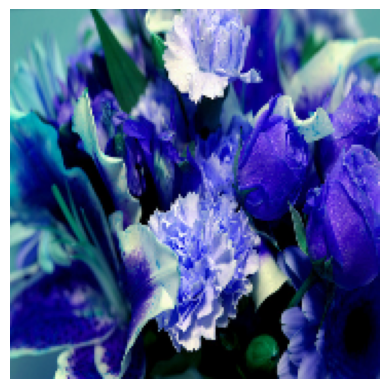

In [19]:
plt.axis('off')
plt.imshow(x[55])

In [24]:
with tf.device('/GPU:0'):  # Replace with '/CPU:0' if no GPU available
    x = tf.cast(x, tf.float32)
    augmented_images = data_aug(x)


ResourceExhaustedError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Cast]

In [25]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    details = tf.config.experimental.get_memory_info('GPU:0')
    print(f"GPU Memory: {details}")


GPU Memory: {'current': 1118357248, 'peak': 1733672448}
